In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

C:\Users\Public\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = np.load('../data/ts_cut/ihb.npy')
means = np.nanmean(data, axis=0)
data_filled = np.where(np.isnan(data), means, data)
data.shape, data[0, 0, 0]

((320, 10, 246), -1.2080516271370063)

In [33]:
def count_nan_values(data):
    nan_count = np.isnan(data).sum()
    total_elements = data.size
    nan_percentage = (nan_count / total_elements) * 100
    return nan_count, nan_percentage

In [3]:
guy = data[:, :, 0]
guy.shape, guy

((320, 10),
 array([[-1.20805163e+00, -9.15837054e-01, -5.82438250e-01, ...,
          5.99499068e-01, -2.05547329e-01,  7.86760412e-01],
        [ 1.02389546e+00, -9.29716743e-01, -3.41629252e-01, ...,
          1.04673451e+00,  1.39276165e-01, -1.36538101e+00],
        [ 8.17854450e-01, -3.39151069e-01,  1.16818813e+00, ...,
         -1.25069185e-01,  1.50202891e-03,  4.01659570e-01],
        ...,
        [ 1.68166144e+00,  2.62376247e-01,  8.37748891e-02, ...,
         -3.42288649e-01, -5.66129102e-01, -7.67054871e-01],
        [-5.40128141e-01, -3.31080917e-01, -1.23031036e+00, ...,
         -5.28072129e-01,  6.94622447e-01,  3.66038916e-01],
        [-1.20782776e-01,  4.89435880e-01, -2.32544953e+00, ...,
         -8.99009184e-01,  9.17174650e-01,  1.58648053e+00]]))

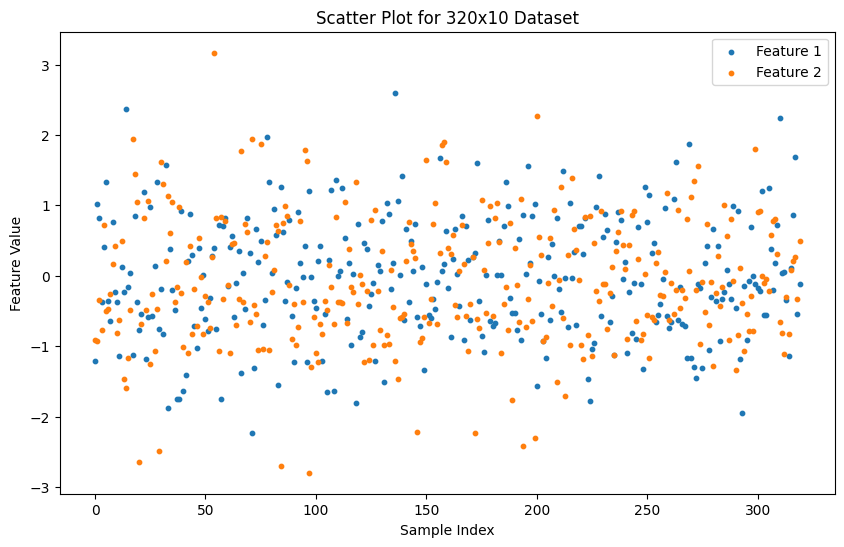

In [5]:
def graf_2d(data):
    # Построение графика
    plt.figure(figsize=(10, 6))

    for i in range(data.shape[1]):  # Для каждого признака (столбца)
        plt.scatter(range(data.shape[0]), data[:, i], label=f'Feature {i+1}', s=10)  # s - размер точки

    plt.title('Scatter Plot for 320x10 Dataset')
    plt.xlabel('Sample Index')
    plt.ylabel('Feature Value')
    plt.legend()
    plt.show()

graf_2d(guy)

C:\Users\Админ\AppData\Local\Temp\ipykernel_33492\3851069789.py:14: MatplotlibDeprecationWarning: The clean function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use none, you no longer need to clean a Grouper instead.
  ax.scatter(X, np.full_like(X, i), Z, label=f'Feature {i+1}', s=10)


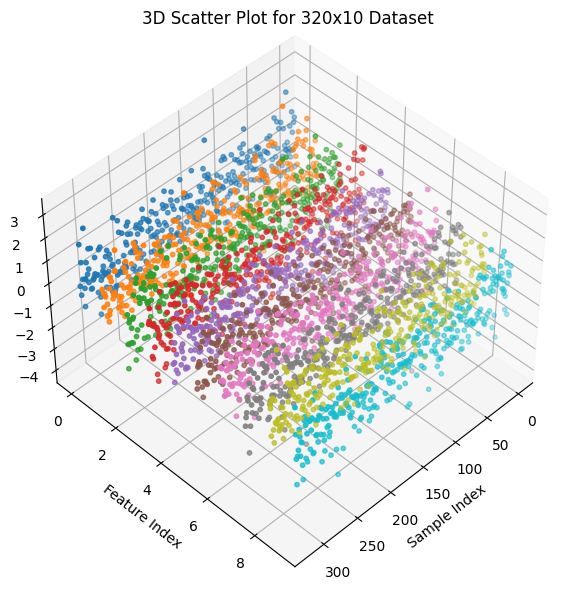

In [27]:
def graf_3d(data):
    # Построение 3D графика
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Для наглядности будем использовать 3 координаты: X, Y и Z
    # X - это индексы строк (samples), Y - это индексы признаков (features), Z - это значения признаков
    X = np.arange(data.shape[0])  # Индексы строк (320)
    Y = np.arange(data.shape[1])  # Индексы признаков (10)

    # Для каждого признака строим точки на отдельной плоскости
    for i in range(data.shape[1]):  # Для каждого признака (столбца)
        Z = guy[:, i]
        ax.scatter(X, np.full_like(X, i), Z, label=f'Feature {i+1}', s=10)

    ax.set_title('3D Scatter Plot for 320x10 Dataset')
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Feature Index')
    ax.set_zlabel('Feature Value')
    ax.view_init(elev=45, azim=45)

    plt.show()
    
    
graf_3d(guy)

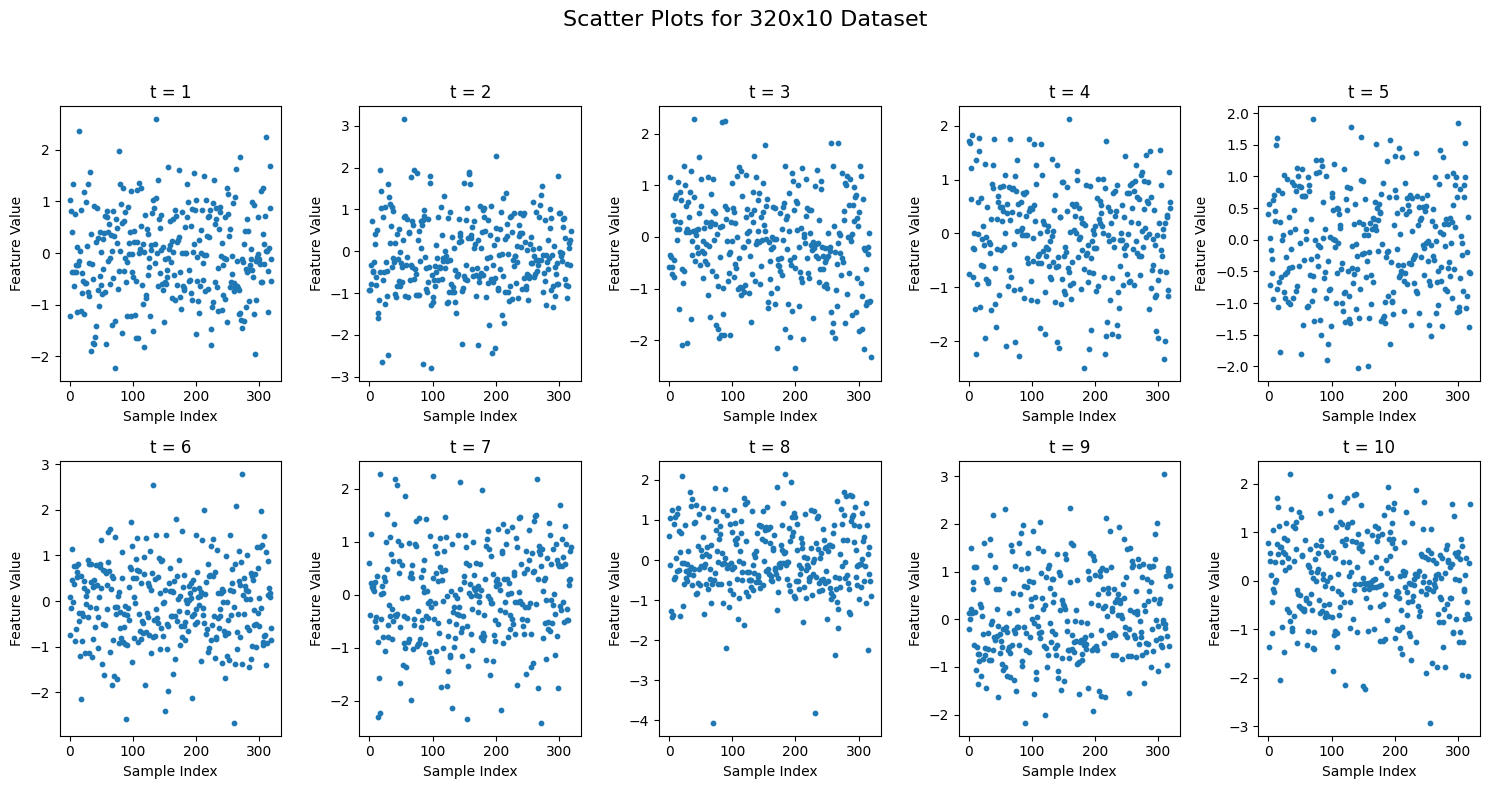

In [33]:
def ten_grafs(data):
    fig, axs = plt.subplots(2, 5, figsize=(15, 8))  # 2 строки, 5 столбцов для 10 графиков
    fig.suptitle('Scatter Plots for 320x10 Dataset', fontsize=16)

    for i in range(10):
        row, col = divmod(i, 5)  # Вычисление строки и столбца
        axs[row, col].scatter(range(data.shape[0]), data[:, i], s=10)
        axs[row, col].set_title(f't = {i+1}')
        axs[row, col].set_xlabel('Sample Index')
        axs[row, col].set_ylabel('Feature Value')

    # Настройка макета для более компактного отображения
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Оставляем место для заголовка
    plt.show()
    
ten_grafs(guy)

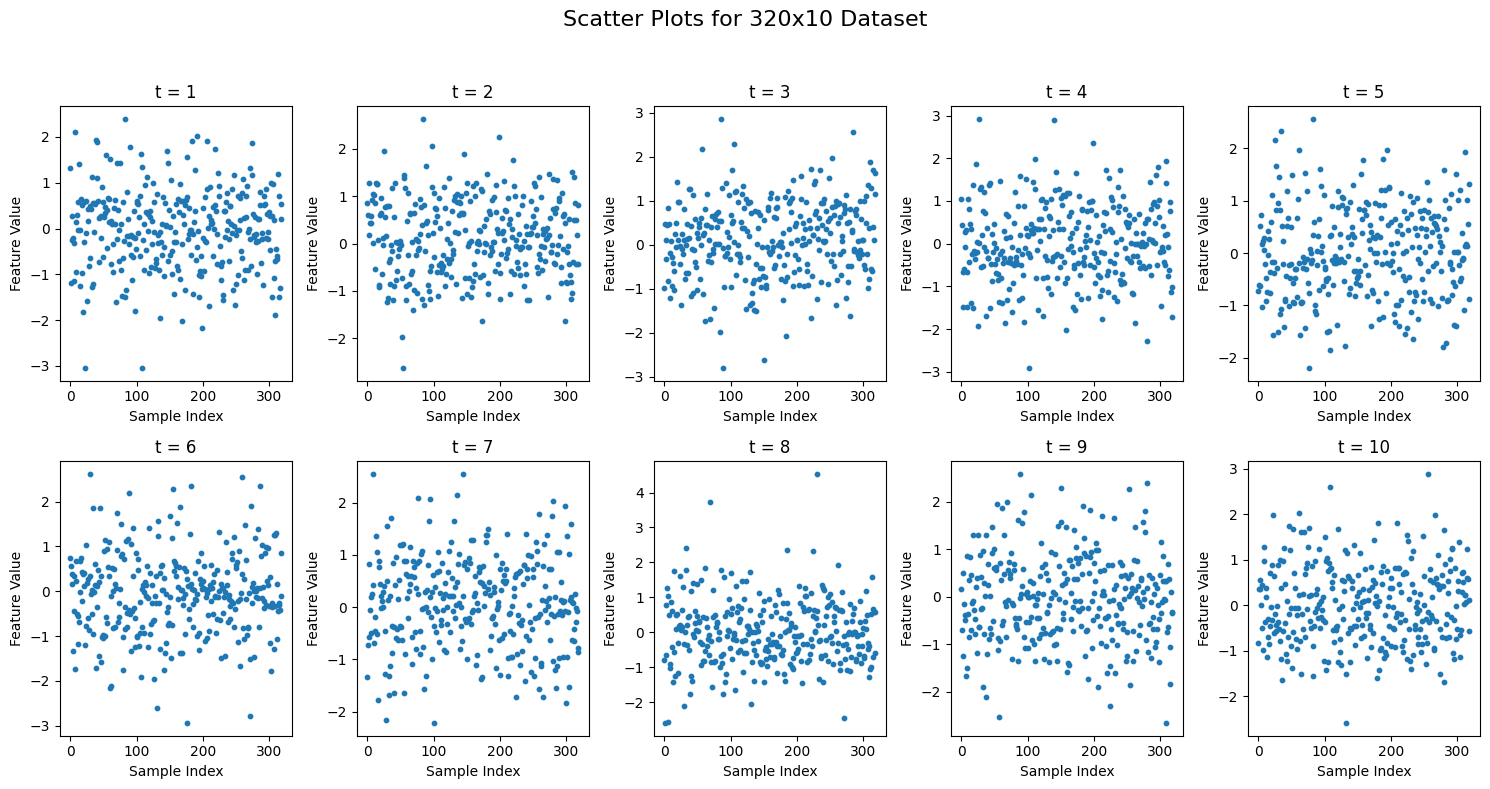

In [61]:
first_guy = data[:, :, 0]
second_guy = data[:, :, 1]

diff = second_guy - first_guy
ten_grafs(diff)

In [62]:
np.mean(diff, axis=0)

array([-0.01480333,  0.13791479,  0.12451777,  0.00742503,  0.01058093,
       -0.06148321,  0.08091099,  0.00945121, -0.04180809,  0.0202249 ])

In [64]:
results = {i: [] for i in range(data.shape[0])}
for i in range(data.shape[2] - 1):
    diff = data[:, :, i + 1] - data[:, :, i]
    values = np.mean(diff, axis=1)
    for j, value in enumerate(values):
        results[j].append(value)
df = pd.DataFrame(data=results)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
0,-0.056400,-0.338153,-0.113973,0.121981,0.055250,-0.385986,-0.004989,0.038642,0.145758,-0.089468,...,-0.030906,-0.019362,-0.076832,0.143112,0.285912,0.100457,0.130691,-0.082168,0.154850,-0.192109
1,0.378273,0.136353,-0.201568,-0.356483,-0.022235,0.119556,0.297005,-0.309238,-0.024696,0.279402,...,-0.118679,-0.068664,0.120165,0.041028,0.172995,0.163534,0.040106,-0.133118,0.201634,0.367099
2,-0.235675,-0.127751,0.214494,-0.057470,-0.449130,-0.041300,0.021034,0.032548,-0.199174,-0.219732,...,0.104782,0.102087,-0.246617,0.159134,-0.506213,-0.066872,-0.570176,0.308639,-0.278311,-0.171044
3,0.029526,0.015556,0.077018,-0.094959,0.573396,-0.047123,-0.319410,-0.117828,0.327255,0.027042,...,-0.030399,-0.001848,0.344822,-0.256626,0.523833,-0.192402,0.745241,-0.168245,0.171304,0.265333
4,-0.108269,0.307028,-0.056472,0.085286,-0.431760,0.358894,0.153151,0.044358,-0.314570,0.372635,...,-0.022801,-0.252533,-0.569411,0.129679,0.085694,0.043012,-0.168547,-0.221906,-0.163589,-0.393202


In [69]:
df.describe()[df.describe().std > 0.4]

TypeError: '>' not supported between instances of 'method' and 'float'

In [80]:
np.mean(data, axis=1).shape

(320, 246)

In [100]:
df = pd.DataFrame(data=np.mean(data, axis=1))
correlation_matrix = df.corr()
correlation_matrix

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
0,1.000000,0.555005,0.267522,0.423548,0.153061,0.142887,0.300213,0.244662,0.192270,0.213734,...,0.144870,0.007120,0.390873,0.014656,0.191866,0.207725,0.323560,0.291159,0.013064,0.191804
1,0.555005,1.000000,0.355255,0.350470,0.342067,0.088607,0.521029,0.411156,0.366394,0.255310,...,-0.012376,0.182027,0.208145,0.018828,0.042994,0.106423,0.177177,0.208900,0.213261,0.149024
2,0.267522,0.355255,1.000000,0.204138,0.522337,0.206033,0.328670,0.132613,0.200136,-0.002921,...,0.281997,-0.019665,0.207468,-0.073035,0.175054,-0.054496,0.246874,-0.045383,-0.148070,-0.051025
3,0.423548,0.350470,0.204138,1.000000,-0.011653,0.283893,0.191718,0.165763,-0.078861,0.256355,...,0.368692,0.164223,0.177697,0.046441,0.030796,0.095792,0.188989,0.003121,0.062055,0.165647
4,0.153061,0.342067,0.522337,-0.011653,1.000000,0.043615,0.487072,0.011599,0.335651,-0.029308,...,0.211635,-0.083256,0.123934,-0.156127,-0.037965,-0.097891,0.087616,0.041607,-0.141798,-0.128091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,0.207725,0.106423,-0.054496,0.095792,-0.097891,0.101066,-0.087406,0.025956,0.080537,-0.038177,...,0.334929,0.181409,0.286723,0.478736,0.319698,1.000000,0.404275,0.304779,0.075416,0.351520
242,0.323560,0.177177,0.246874,0.188989,0.087616,0.091076,-0.002124,0.051771,0.033508,-0.249913,...,0.399784,0.150328,0.256991,0.278322,0.241604,0.404275,1.000000,0.552728,0.083247,0.233174
243,0.291159,0.208900,-0.045383,0.003121,0.041607,0.034495,-0.132313,-0.041598,0.369018,-0.036583,...,0.199745,0.151973,0.238209,0.243239,0.218219,0.304779,0.552728,1.000000,0.225640,0.300112
244,0.013064,0.213261,-0.148070,0.062055,-0.141798,-0.035983,-0.205560,0.087487,0.115965,0.061702,...,0.232370,0.461106,0.263732,0.035982,0.030133,0.075416,0.083247,0.225640,1.000000,0.331043


In [106]:
threshold = 0.1
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) < threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            high_corr_pairs.append(pair)

# Вывод пар с корреляцией выше порога
for pair in high_corr_pairs:
    print(f'Correlation between {pair[0]} and {pair[1]}: {pair[2]}')

Correlation between 0 and 14: 0.08612617710743567
Correlation between 0 and 16: 0.08460514502467123
Correlation between 0 and 17: -0.029270024588588087
Correlation between 0 and 19: 0.02750712379231942
Correlation between 0 and 20: 0.09709353778005386
Correlation between 0 and 21: -0.0274607019561349
Correlation between 0 and 23: 0.06180583648236741
Correlation between 0 and 24: 0.02506271201117115
Correlation between 0 and 25: 0.05069753630369734
Correlation between 0 and 27: 0.026555403046905617
Correlation between 0 and 28: 0.09748221062530155
Correlation between 0 and 29: -0.04530278437340007
Correlation between 0 and 31: -0.05334376821719311
Correlation between 0 and 33: -0.0404570493671982
Correlation between 0 and 34: -0.003563098330559127
Correlation between 0 and 35: -0.06363861782174313
Correlation between 0 and 36: 0.09068642383718166
Correlation between 0 and 37: 0.06476374215606366
Correlation between 0 and 38: 0.08651439457783554
Correlation between 0 and 40: -0.029230235

**Есть пары между которыми высокий коэф кореляции у разных людей. На них нужно обращать внимания меньше всего**

In [107]:
len(high_corr_pairs)

14580

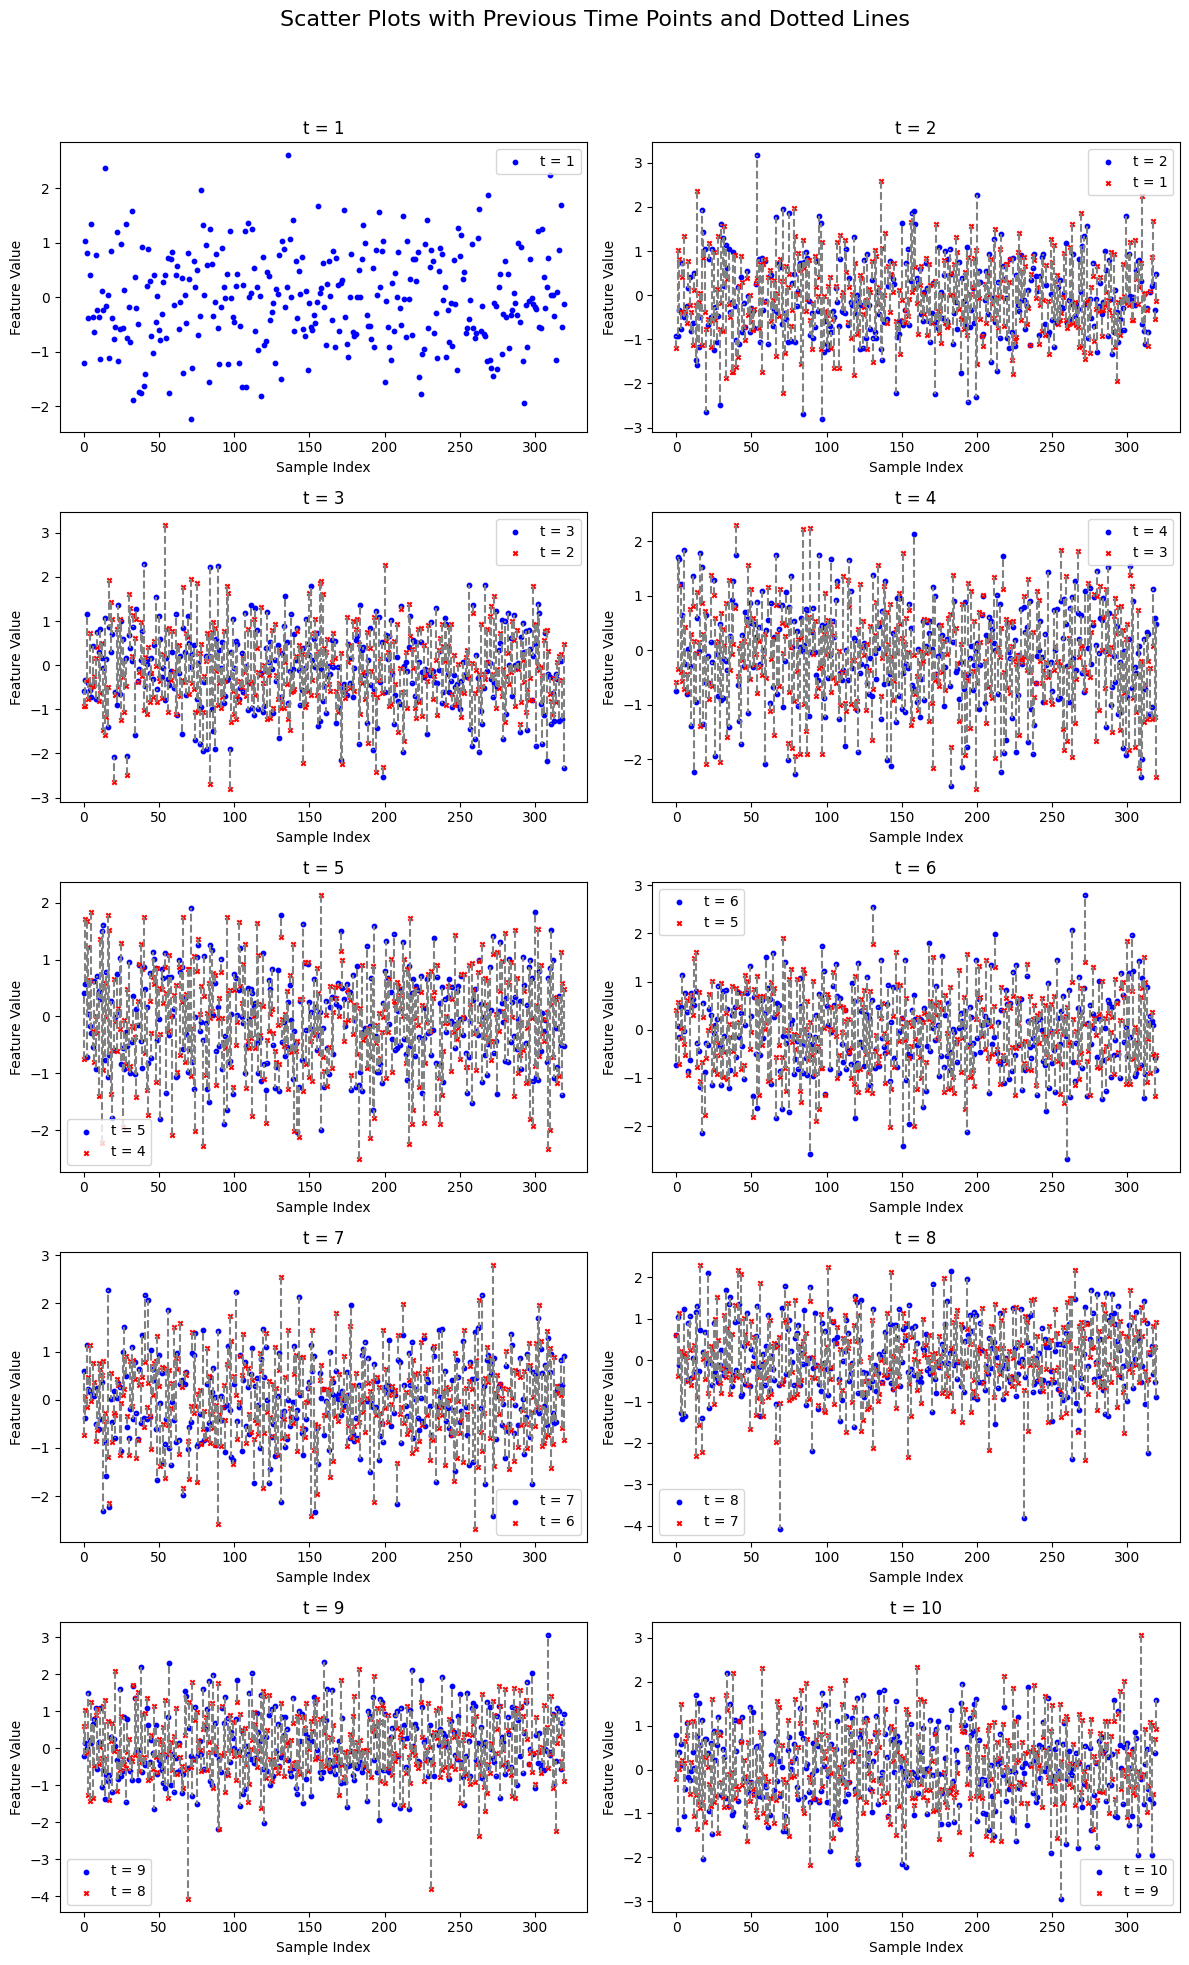

In [12]:
def ten_grafs_with_previous_and_lines(data):
    fig, axs = plt.subplots(5, 2, figsize=(12, 20))  # 5 строк, 2 столбца для 10 графиков
    fig.suptitle('Scatter Plots with Previous Time Points and Dotted Lines', fontsize=16)

    for i in range(10):  # Отображаем все 10 графиков
        row, col = divmod(i, 2)  # Вычисляем строку и столбец для 5x2 сетки

        # Текущие точки
        axs[row, col].scatter(range(data.shape[0]), data[:, i], s=10, label=f't = {i+1}', color='blue')

        # Если i > 0, рисуем предыдущие точки и соединяем их пунктирными линиями
        if i > 0:
            axs[row, col].scatter(range(data.shape[0]), data[:, i-1], s=10, label=f't = {i}', color='red', marker='x')

            # Добавляем пунктирные линии между соответствующими точками
            for j in range(data.shape[0]):
                axs[row, col].plot([j, j], [data[j, i-1], data[j, i]], linestyle='--', color='gray')

        axs[row, col].set_title(f't = {i+1}')
        axs[row, col].set_xlabel('Sample Index')
        axs[row, col].set_ylabel('Feature Value')
        axs[row, col].legend()

    # Настройка макета для более компактного отображения
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Оставляем место для заголовка
    plt.show()

# Пример использования
# guy = np.random.rand(320, 10)  # Пример данных, замени на свой массив
ten_grafs_with_previous_and_lines(guy)

In [17]:
new_data = np.zeros((320, 246))
for i in range(246):
    new_data[:, i] = np.mean(data[i, :, i])
    
new_data.shape

(320, 246)

In [23]:
new_data = np.mean(data, axis=1)

new_data.shape

(320, 246)

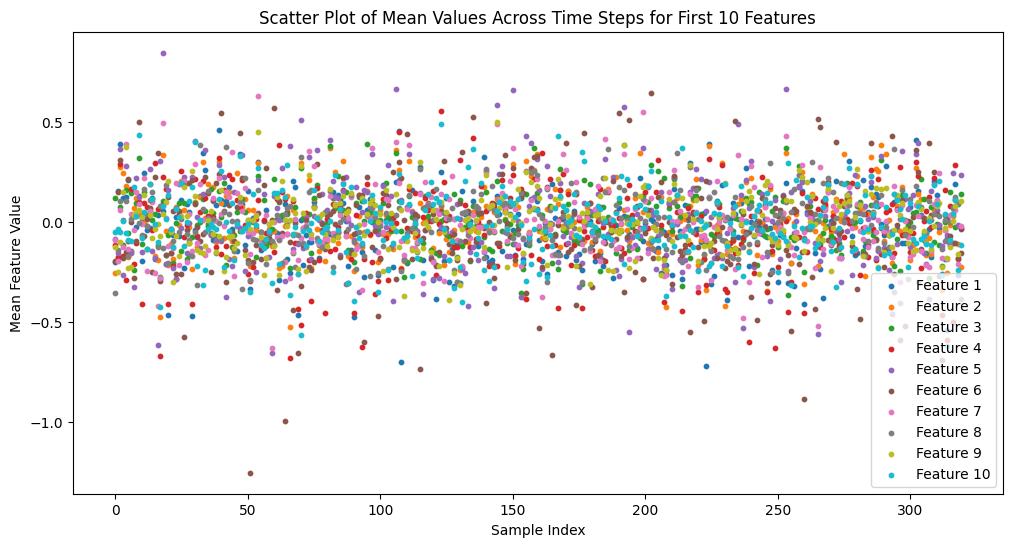

In [29]:
# Построение точечного графика
def scatter_mean_data(new_data):
    plt.figure(figsize=(12, 6))
    
    # Выводим точки для первых 10 признаков
    for i in range(10):  # Можешь изменить это на любое количество признаков
        plt.scatter(range(new_data.shape[0]), new_data[:, i], label=f'Feature {i+1}', s=10)

    plt.title('Scatter Plot of Mean Values Across Time Steps for First 10 Features')
    plt.xlabel('Sample Index')
    plt.ylabel('Mean Feature Value')
    plt.legend()
    plt.show()

# Вызов функции для построения точечного графика
scatter_mean_data(new_data)


In [40]:
# var_data = np.zeros((320, 246))

# Вычисление дисперсии для каждого признака среди 10 временных шагов
var_data = np.var(data, axis=1)  # Дисперсия по временной оси (axis=1)

count_nan_values(var_data)

(7360, 9.34959349593496)

In [43]:
a = np.array([np.nan, 0, 1, 2, 34, 5])
np.nan in a

False

In [45]:
for i in range(var_data.shape[1]):
    if np.isnan(var_data[:, i]).sum() > 0:
        print(i, var_data[:, i])

200 [0.24445706        nan 0.40738934 0.49869808        nan        nan
 0.27308395 0.12762721        nan        nan        nan 0.42803449
 0.18660542        nan 0.60879336        nan        nan        nan
        nan 0.27592622 0.09031734 0.61323069        nan 0.09379953
 0.5871252         nan        nan 1.15768233        nan 0.06849239
        nan 0.75196876 0.13854416        nan 0.62777467 0.67439574
        nan 0.3215591         nan        nan        nan 0.5013253
 0.52923535        nan        nan 0.42159576 0.19234576        nan
 0.34584355 0.10378321 0.30790672        nan 0.15111889        nan
        nan        nan 0.18144087        nan        nan        nan
        nan        nan 0.27938585 0.04266307        nan 0.34174829
        nan        nan 0.34251642        nan        nan 0.46942214
 0.19883381        nan        nan        nan 0.68631222        nan
 0.54320654        nan 0.20728874        nan 0.86115076 0.18760414
        nan 0.26401555        nan 0.2940631         nan 0.1

In [42]:
nan_count = np.isnan(var_data).sum()
nan_count

7360